# Image Processing with keras in Python

Apuntes de https://learn.datacamp.com/courses/image-processing-with-keras-in-python

Para los computadores las imagenes no son mas que un conjunto de numeros.

Las imagenes en colores tienen 3 dimensiones:
    - Altura
    - Ancho
    - RGB

## 0 - Dataset

El dataset a usar durante todo este notebook lo pueden obtener en https://www.kaggle.com/paramaggarwal/fashion-product-images-small

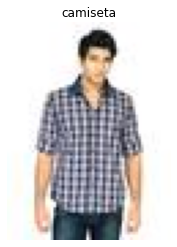

In [1]:
import matplotlib.pyplot as plt
ruta = "datasets/myntradataset/images/15970.jpg"
camiseta = plt.imread(ruta)
plt.imshow(camiseta)
plt.title("camiseta")
plt.axis('off')
plt.show()

El dataset viene con un csv en donde se indican las etiquetas de cada uno de los productos

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/myntradataset/styles.csv", error_bad_lines=False)

print(df.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [3]:
df[df['id'] == 15970]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


¿Cuantas categorias distintas hay en el dataset?

In [4]:
df["articleType"].nunique()

143

In [5]:
df["articleType"].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [6]:
df["articleType"].value_counts()[:10]

Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: articleType, dtype: int64

Para usar menos memoria limitaremos el dataset a solo tres categorias Shirts, Casual Shoes y Watches

In [3]:
df = df[df["articleType"].isin(["Shirts", 'Watches', 'Casual Shoes'])]

In [4]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


## 1- Clasificando imagenes

### 1.1- One Hot encoding

Vamos a crear un array en donde cada clasificacion corresponda a un elemento del vector

In [4]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# El termino ignore hara que las categorias que no estan presentes al momento de hacer un fit
# No aparezcan despues
enc = OneHotEncoder(handle_unknown='ignore')
oneHot = enc.fit_transform(np.array(df['articleType']).reshape(-1, 1))

In [6]:
oneHot.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [7]:
enc.get_feature_names()

array(['x0_Casual Shoes', 'x0_Shirts', 'x0_Watches'], dtype=object)

In [5]:
df = pd.concat([df.reset_index(drop=True),
                pd.DataFrame(oneHot.toarray(), columns=enc.get_feature_names())], axis=1)

In [13]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,x0_Casual Shoes,x0_Shirts,x0_Watches
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,0.0,1.0,0.0
1,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,0.0,0.0,1.0
2,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,0.0,1.0,0.0
3,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,0.0,1.0,0.0
4,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,0.0,0.0,1.0


### 1.2- Entrenando una red full conectada

Todos los nodos de un layer estan conectados con todos los nodos del layer anterior

In [15]:
from tensorflow.keras.layers import Dense
from skimage import color
from sklearn.model_selection import train_test_split

df_ = df.sample(1000)

X_train, X_test, y_train, y_test = train_test_split(df_[['id']],
                                                    df_[['x0_Casual Shoes', 'x0_Shirts',
                                                        'x0_Watches']],  test_size=0.33,
                                                    random_state=42)
X_train.reset_index(inplace=True, drop=True)
train_data = []
for i in range(len(X_train)):
    # Cargamos los datos
    file = X_train.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    train_data.append(image)

X_test.reset_index(inplace=True, drop=True)
test_data = []
for i in range(len(X_test)):
    # Cargamos los datos
    file = X_test.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    image = plt.imread(ruta)
    # La pasamos a blamco y negro
    image = np.array(color.rgb2gray(image))
    test_data.append(image)    

In [16]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

El término input_shape nos dice cuantos inputs tiene cada una de las imagenes

In [17]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(Dense(100, activation='relu', input_shape=(80*60,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [18]:
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
train_data = train_data.reshape((670, 80*60))
test_data = test_data.reshape((330, 80*60))

In [20]:
y_train = y_train.to_numpy().reshape((670, 3*1))
y_test = y_test.to_numpy().reshape((330, 3*1))

In [24]:
model.fit(train_data, y_train, validation_split=0.2,
          epochs=20)

Epoch 1/20
17/17 [==============================] - 0s 15ms/step - loss: 0.1781 - accuracy: 0.9646 - val_loss: 0.2296 - val_accuracy: 0.9627
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.1743 - accuracy: 0.9646 - val_loss: 0.2237 - val_accuracy: 0.9627
Epoch 3/20
17/17 [==============================] - 0s 10ms/step - loss: 0.1720 - accuracy: 0.9608 - val_loss: 0.2207 - val_accuracy: 0.9627
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.1674 - accuracy: 0.9646 - val_loss: 0.2167 - val_accuracy: 0.9627
Epoch 5/20
17/17 [==============================] - 0s 12ms/step - loss: 0.1643 - accuracy: 0.9646 - val_loss: 0.2165 - val_accuracy: 0.9627
Epoch 6/20
17/17 [==============================] - 0s 12ms/step - loss: 0.1617 - accuracy: 0.9664 - val_loss: 0.2116 - val_accuracy: 0.9627
Epoch 7/20
17/17 [==============================] - 0s 11ms/step - loss: 0.1583 - accuracy: 0.9664 - val_loss: 0.2077 - val_accuracy: 0.9627
Epoch 8/20
17

In [25]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9455


[0.3328985869884491, 0.9454545378684998]

### 2- Convoluciones

En una red full conectada cada pixel estaba conectado de alguna forma con los pesos del siguiente layer. Sin embargo, los pixeles de una imagen suelen estar relacionados con los pixeles vecinos

Un ejemplo de esto se da cuando las imagenes tienen borde y todos los pixeles en el borde cumplen un patrón similar

Buscar una misma caracteristica, como una forma u orientacion particular, en cada subparte de una imagen es la idea de la operación matematica llamada convolución

### 2.1 - ¿Qué es una convolucion?

Supongamos tenemos un array como el de a continuación:

In [9]:
import numpy as np

array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Y definimos que queremos buscar, como en este caso, donde buscamos un cambio de un valor inferior a un valor superior

In [10]:
kernel = np.array([-1,1])

# Empezamos con todos los valores en cero
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# En cada posicion multiplicamos los valores del array por el kernel y sumamos
conv[0] = (kernel * array[0:2]).sum()
conv[1] = (kernel * array[1:3]).sum()
conv[2] = (kernel * array[2:4]).sum()

for i in range(8):
    conv[i] = (kernel * array[i:i+2]).sum()
    
conv

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

El resultado muestra donde se hizo el cambio

Si usamos otro array, donde  no solo cambie de ascendentemente, sino que tambien descendentemente, entonces en ese caso veremos un -1.

In [12]:
import numpy as np

array = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0])
kernel = np.array([-1,1])

# Empezamos con todos los valores en cero
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(8):
    conv[i] = (kernel * array[i:i+2]).sum()
    
conv

array([ 0,  1,  0, -1,  1,  0,  0, -1,  0,  0])

Si intentamos lo mismo en dos dimensiones

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

array = np.array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0])
kernel = np.array([[-1,1],
                   [-1, 1]])

# Empezamos con todos los valores en cero
conv = np.zeros((80, 60))

# Cargamos la imagen
ruta = "datasets/myntradataset/images/15970.jpg"
image = plt.imread(ruta)
# La pasamos a blamco y negro
image = np.array(color.rgb2gray(image))

print(image.shape)

for i in range(80):
    for j in range(60):
        window = image[i:i+2, j:j+2]
        conv[i, j] = np.sum(window*kernel)
    
conv

(80, 60)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00113098, -0.01961647, -0.00280549, ...,  0.        ,
        -0.00113098,  0.        ],
       [ 0.00113098, -0.01961647,  0.        , ...,  0.        ,
        -0.00113098,  0.        ],
       [ 0.00113098, -0.01961647,  0.        , ...,  0.        ,
        -0.00113098,  0.        ]])

En la redes neuronales el array anterior se conoce como feature map, porque es un mapa que indica donde estan la caracterisitica que se busca

### 2.2- Implementando una convolucion

Un layer convolucional solo tiene un peso (weight) para cada pixel en el kernel

Por ejemplo, si el tamaño del kernel es 3, significa que cada kernel tiene 9 pixeles, y si el layer tiene 10 unidades, serán 90 parametros para esas kernels

In [6]:
from tensorflow.keras.layers import Dense
from skimage import color
from sklearn.model_selection import train_test_split

df_ = df.sample(1000)

X_train, X_test, y_train, y_test = train_test_split(df_[['id']],
                                                    df_[['x0_Casual Shoes', 'x0_Shirts',
                                                        'x0_Watches']],  test_size=0.33,
                                                    random_state=42)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
train_data = []
for i in range(len(X_train)):
    # Cargamos los datos
    file = X_train.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    try:
        image = plt.imread(ruta)
        # La pasamos a blanco y negro
        image = np.array(color.rgb2gray(image))
        train_data.append(image)
    except FileNotFoundError:
        print(f'Image {ruta} does not exist')
        y_train.drop([i], inplace=True)
n_train = len(train_data)
print(f"Number of image to train {n_train}")

X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
test_data = []
for i in range(len(X_test)):
    # Cargamos los datos
    file = X_test.loc[i, "id"]
    ruta = f"datasets/myntradataset/images/{file}.jpg"
    try:
        image = plt.imread(ruta)
        # La pasamos a blamco y negro
        image = np.array(color.rgb2gray(image))
        test_data.append(image)    
    except FileNotFoundError:
        print(f'Image {ruta} does not exist')
        y_test.drop([i], inplace=True)
n_test = len(test_data)
print(f"Number of image to test {n_test}")

train_data = np.asarray(train_data)
test_data = np.asarray(test_data)
train_data = train_data.reshape((n_train, 80, 60, 1))
test_data = test_data.reshape((n_test, 80, 60, 1))

y_train = y_train.to_numpy().reshape((n_train, 3*1))
y_test = y_test.to_numpy().reshape((n_test, 3*1))

Number of image to train 670
Number of image to test 330


In [63]:
train_data.shape

(669, 80, 60, 1)

In [7]:
img_rows = 80
img_cols = 60

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

El Flatten layer actua como una conexion entre los layers convolucionales y los densos. Lleva el resultado de la convolución a un array de una dimensión

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
model.fit(train_data, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
17/17 [==============================] - 2s 51ms/step - loss: 1.5779 - accuracy: 0.5013 - val_loss: 0.2893 - val_accuracy: 0.9627
Epoch 2/20
17/17 [==============================] - 1s 40ms/step - loss: 0.4157 - accuracy: 0.8266 - val_loss: 0.2029 - val_accuracy: 0.9552
Epoch 3/20
17/17 [==============================] - 1s 37ms/step - loss: 1.5164 - accuracy: 0.8286 - val_loss: 5.0473 - val_accuracy: 0.4104
Epoch 4/20
17/17 [==============================] - 1s 36ms/step - loss: 3.8290 - accuracy: 0.4682 - val_loss: 3.9235 - val_accuracy: 0.6940
Epoch 5/20
17/17 [==============================] - 1s 39ms/step - loss: 1.0936 - accuracy: 0.7179 - val_loss: 0.4231 - val_accuracy: 0.9254
Epoch 6/20
17/17 [==============================] - 1s 37ms/step - loss: 0.4256 - accuracy: 0.9580 - val_loss: 0.2134 - val_accuracy: 0.9776
Epoch 7/20
17/17 [==============================] - 1s 37ms/step - loss: 0.2112 - accuracy: 0.9720 - val_loss: 0.1283 - val_accuracy: 0.9776
Epoch 8/20
17

In [57]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9939


[0.020566988736391068, 0.9939393997192383]

### 2.3- Zero padding

Cuando una imagen pasa por un layer convolucional, el resultado tiene menor tamaño que la imagen original. Si queremeos obtener el mismo tamaño, una forma de hacerlo es usando zero padding.

La idea es agregar un borde a la imagen original, para que estos pixeles adicionales sean parte de cada una de las kernel, de esta manera el feature map, tendrá el mismo tamaño que la imagen original

Es útil si se quiere construir una red con muchos layers, de otra forma, se perderian pixeles por cada uno de estos

Para implementar zero padding se debe modificar el parametro padding, por defecto es 'valid', que implica que el resultado tendrá menor tamaño a la imagen original, si queremos que sean de igual tamaño usamos 'same'

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
17/17 [==============================] - 2s 61ms/step - loss: 27.9788 - accuracy: 0.3019 - val_loss: 15.4816 - val_accuracy: 0.2910
Epoch 2/20
17/17 [==============================] - 1s 39ms/step - loss: 8.0460 - accuracy: 0.4604 - val_loss: 2.1875 - val_accuracy: 0.7015
Epoch 3/20
17/17 [==============================] - 1s 37ms/step - loss: 1.7630 - accuracy: 0.6770 - val_loss: 0.6116 - val_accuracy: 0.6493
Epoch 4/20
17/17 [==============================] - 1s 37ms/step - loss: 0.4501 - accuracy: 0.7991 - val_loss: 0.2010 - val_accuracy: 0.9403
Epoch 5/20
17/17 [==============================] - 1s 48ms/step - loss: 3.7006 - accuracy: 0.6897 - val_loss: 0.4258 - val_accuracy: 0.7910
Epoch 6/20
17/17 [==============================] - 1s 48ms/step - loss: 0.5780 - accuracy: 0.8560 - val_loss: 1.0905 - val_accuracy: 0.6866
Epoch 7/20
17/17 [==============================] - 1s 39ms/step - loss: 1.6247 - accuracy: 0.6965 - val_loss: 0.4664 - val_accuracy: 0.8433
Epoch 8/20


### 2.4- Strides

Otro de los factores que afecta el tamaño de output de una convolucion es el Stride, que es cuantos pixeles avanza entre kernel y kernel.

Los strides se pueden manejar con el parametro *strides*, por defecto es 1, lo que significa que el kernel revisa la ubicación de cada pixel, sin embargo, si se declara un valor mayor a 1, el kernel saltara la cantidad de pixeles que se declaren

Mientras mayor el stride, menor es el tamaño del output que se obtiene

### 2.5 Tamaño de output

El tamaño del output de un layer convolucional se puede calcular de la siguiente forma:

$O = ((I - K + 2P) / S) + 1$

- I: Tamaño del input
- K: Tamaño del kernel
- P: Tamaño del padding
- S: Strides

### 2.6 Convoluciones dilatadas

Una convolucion dilatada es cuando el kernel tiene toma menos parametros que los de su tamaño. Por ejemplo, en un kernel de 5x5, podriamos solo usar pixel por medio, usando un total de 9 parametros en el kernel, en vez de los 25 que se usarían normalmente

Esta técnica es útil cuando se necesita agregar información a lo largo de múltiples escalas

Esto se puede controlar con un parametro llamado *dilatation_rate*

## 3- Deep Learning

Una de las ventajas de las redes convolucionales es poder construir redes neuronales con múltiples capas convolucionales, cuando se agregan capas se habla de deep learning.

La idea de agregar capas adicionales yace en que cada kernel y featuremap en cada uno de las capas que se agregan son capaces de responer cosas distintas.

Por ejemplo, lo primeros layes suele responder a patrones simples, como lineas y orientaciones. Los layers intermedios ya buscan patrones más complejos, como objetos.

Mientras más profunda la red, mayor sera el costo computacional y tambien necesitará más datos para entrenarse

Agregando una capa adicional

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
17/17 [==============================] - 3s 124ms/step - loss: 1.2506 - accuracy: 0.4896 - val_loss: 0.4821 - val_accuracy: 0.8657
Epoch 2/20
17/17 [==============================] - 2s 98ms/step - loss: 1.5569 - accuracy: 0.6515 - val_loss: 0.2850 - val_accuracy: 0.9179
Epoch 3/20
17/17 [==============================] - 1s 88ms/step - loss: 0.2615 - accuracy: 0.9328 - val_loss: 0.1257 - val_accuracy: 0.9776
Epoch 4/20
17/17 [==============================] - 2s 88ms/step - loss: 0.1055 - accuracy: 0.9846 - val_loss: 0.0672 - val_accuracy: 0.9776
Epoch 5/20
17/17 [==============================] - 2s 89ms/step - loss: 0.0574 - accuracy: 0.9911 - val_loss: 0.0672 - val_accuracy: 0.9851
Epoch 6/20
17/17 [==============================] - 2s 89ms/step - loss: 0.0487 - accuracy: 0.9826 - val_loss: 0.0572 - val_accuracy: 0.9851
Epoch 7/20
17/17 [==============================] - 2s 95ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.0372 - val_accuracy: 0.9851
Epoch 8/20
1

In [70]:
model.evaluate(test_data, y_test)

11/11 [==============================] - 0s 23ms/step - loss: 1.6958 - accuracy: 0.9818


[1.6958446502685547, 0.9818181991577148]

### 3.1- Número de parámetros

Cuando se construye un modelo con keras podemos obtener la descripción de dicho modelo usando el método *.summary()*

Con este metodo podemos conocer el numero total de parametros que tiene el modelo

Si usamos el siguiente modelo tenemos

In [78]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))

Parametros Layer 1: $(784*10 + 10)$
- El largo del input, multiplicado por cada unidad y sumando el bias

In [79]:
model.add(Dense(10, activation='relu'))

Parametros Layer 2: $(10*10 + 10)$
- El numero de unidades del layer anterior, multiplicado por el numero del layer actual y sumando el bias

In [80]:
model.add(Dense(3, activation='softmax'))

Parametros Layer 3: $(10*3 + 3)$
- El numero de unidades del layer anterior, multiplicado por el numero del layer actual y sumando el bias

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 33        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


Si usaramos un red convolucional

In [98]:
model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28, 28, 1),
                padding='same'))

Parametros Layer 1: $(9*10+10)$
- El número de kernels multiplicado por la cantidad de parametros de cada una, sumando el bias

In [99]:
model.add(Conv2D(10, kernel_size=3, activation='relu', padding='same'))

Parametros Layer 2: $(10*9*10+10)$
- En este layer cada unidad esta conectada mediante un feature map con el primer layer, por ende el número de kernels multiplicado por la cantidad de parametros de cada una y la cantidad de kernels del primer layer, sumando el bias

In [100]:
model.add(Flatten())

Parametros Layer 3: $(0)$
- El Flatten layer no tiene parametros asociados, solo transforma el output del layer anterior en un array muy largo

In [101]:
model.add(Dense(3, activation='softmax'))

Parametros Layer 4: $(7840*3+3)$
- El largo del array resultante (tenemos 10 features maps de tamaño 28x28 cada uno) multiplicado por el numero de unidades y sumando el bias

In [102]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 10)        910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 23523     
Total params: 24,533
Trainable params: 24,533
Non-trainable params: 0
_________________________________________________________________


### 3.2- Pooling

La gran cantidad de parametros que se obtienen al usar redes convolucionales plantea un desafio importante una forma de afrontarlo es usando operaciones de pooling.

La idea detras es resumir el output de cada uno de los layers

Un ejemplo puede ser tomar un conjunto de pixeles, calcular su media, maximo o minimo y con esto obtener un solo nuevo pixel (usualmente se usa maxpooling)

Si integramos Max  pooling a una red convolucional:

- El valor que le damos de input al layer de pooling es el tamaño de la ventana que vamos a agregar

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(MaxPool2D(2))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
17/17 [==============================] - 5s 131ms/step - loss: 1.1882 - accuracy: 0.3749 - val_loss: 1.3058 - val_accuracy: 0.4328
Epoch 2/20
17/17 [==============================] - 1s 68ms/step - loss: 1.0809 - accuracy: 0.4559 - val_loss: 0.9422 - val_accuracy: 0.5000
Epoch 3/20
17/17 [==============================] - 1s 80ms/step - loss: 0.8625 - accuracy: 0.6907 - val_loss: 0.6423 - val_accuracy: 0.9627
Epoch 4/20
17/17 [==============================] - 1s 73ms/step - loss: 0.5683 - accuracy: 0.9336 - val_loss: 0.4162 - val_accuracy: 0.9478
Epoch 5/20
17/17 [==============================] - 2s 89ms/step - loss: 0.3272 - accuracy: 0.9553 - val_loss: 0.2594 - val_accuracy: 0.9776
Epoch 6/20
17/17 [==============================] - 1s 80ms/step - loss: 0.2088 - accuracy: 0.9564 - val_loss: 0.1408 - val_accuracy: 0.9701
Epoch 7/20
17/17 [==============================] - 1s 66ms/step - loss: 0.1524 - accuracy: 0.9698 - val_loss: 0.1058 - val_accuracy: 0.9776
Epoch 8/20
1

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 60, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 30, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 29, 10)        410       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2660)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 7983      
Total params: 8,493
Trainable params: 8,493
Non-trainable params: 0
____________________________________________________

Podemos ver que el número de parametros se redujo con respecto al valor anterior

## 4- Proceso de entrenamiento

Durante el entrenamiento los parametros deberian ir ajustandose y la funcion de perdida ir disminuyendo

Sin embargo, que la función mejore para el set de entrenamiento, no significa que generalice correctamente.

Podría estar sobreajustando los datos al set de entremaiento

Si queremeos ver como ha variado la función de perdida a lo largo del entrenamiento podemos capturar este valor en un variable

Epoch 1/20
17/17 [==============================] - 2s 86ms/step - loss: 1.8954 - accuracy: 0.3743 - val_loss: 1.1143 - val_accuracy: 0.3582
Epoch 2/20
17/17 [==============================] - 1s 64ms/step - loss: 1.3538 - accuracy: 0.3703 - val_loss: 1.7664 - val_accuracy: 0.5970
Epoch 3/20
17/17 [==============================] - 1s 83ms/step - loss: 1.0812 - accuracy: 0.7451 - val_loss: 0.9640 - val_accuracy: 0.7164
Epoch 4/20
17/17 [==============================] - 1s 67ms/step - loss: 0.7085 - accuracy: 0.8615 - val_loss: 0.6040 - val_accuracy: 0.8881
Epoch 5/20
17/17 [==============================] - 1s 70ms/step - loss: 0.4354 - accuracy: 0.9760 - val_loss: 0.5594 - val_accuracy: 0.9179
Epoch 6/20
17/17 [==============================] - 1s 67ms/step - loss: 0.2306 - accuracy: 0.9861 - val_loss: 0.4266 - val_accuracy: 0.9179
Epoch 7/20
17/17 [==============================] - 1s 72ms/step - loss: 0.1430 - accuracy: 0.9900 - val_loss: 0.3499 - val_accuracy: 0.9254
Epoch 8/20
17

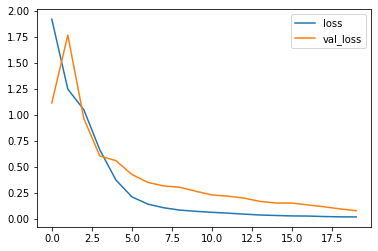

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(MaxPool2D(2))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(train_data, y_train, validation_split=0.2, epochs=20)
plt.plot(training.history["loss"], label='loss')
plt.plot(training.history["val_loss"], label='val_loss')
plt.legend()
plt.show()

La idea entonces es capturar los parametros antes de que empiecen a empeorar para el conjunto de validación, esos parametros los podemos capturar con las funciones callback de keras

Todos los callbacks se agrupan en una lista y se entregan en el proceso de entrenamiento

Epoch 1/20
17/17 [==============================] - 2s 82ms/step - loss: 1.6756 - accuracy: 0.2999 - val_loss: 1.1309 - val_accuracy: 0.3582
Epoch 2/20
17/17 [==============================] - 1s 75ms/step - loss: 1.1847 - accuracy: 0.4232 - val_loss: 0.9837 - val_accuracy: 0.5224
Epoch 3/20
17/17 [==============================] - 1s 66ms/step - loss: 1.0812 - accuracy: 0.4919 - val_loss: 1.1003 - val_accuracy: 0.4328
Epoch 4/20
17/17 [==============================] - 1s 72ms/step - loss: 0.9978 - accuracy: 0.4909 - val_loss: 1.2134 - val_accuracy: 0.6418
Epoch 5/20
17/17 [==============================] - 1s 69ms/step - loss: 0.8471 - accuracy: 0.8041 - val_loss: 0.7592 - val_accuracy: 0.8209
Epoch 6/20
17/17 [==============================] - 1s 67ms/step - loss: 0.6706 - accuracy: 0.9438 - val_loss: 0.9448 - val_accuracy: 0.8881
Epoch 7/20
17/17 [==============================] - 1s 68ms/step - loss: 0.4986 - accuracy: 0.9487 - val_loss: 0.9845 - val_accuracy: 0.8881
Epoch 8/20
17

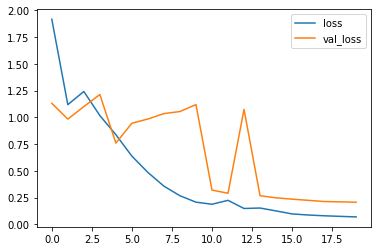

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
                             save_best_only=True)
callbacks_list = [checkpoint]

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(MaxPool2D(2))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(train_data, y_train, validation_split=0.2, epochs=20,
                     callbacks=callbacks_list)
plt.plot(training.history["loss"], label='loss')
plt.plot(training.history["val_loss"], label='val_loss')
plt.legend()
plt.show()

Una vez que guardamos el archivo, podemos leerlo, para poder hacer predicciones con respecto a nuevos inputs

In [20]:
model.load_weights('weights.hdf5')
model.predict_classes(test_data)

array([2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0,
       0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1,
       1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2,
       1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1,
       0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2,
       0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2,

### 4.1- Regularización

Una de las formas de evitar el sobreajuste al set de entrenamiento durante el proceso de entrenamientos es usar procesos de regularización

Son dos las estrategias más comunes para regularizar una red convolucional:

 - Dropout: La idea es que para cada iteración de entrenamiento se seleccione un set al azar de neuronas y estas se ignoren.

Epoch 1/20
17/17 [==============================] - 5s 164ms/step - loss: 3.1680 - accuracy: 0.3783 - val_loss: 1.0899 - val_accuracy: 0.3134
Epoch 2/20
17/17 [==============================] - 2s 136ms/step - loss: 1.2132 - accuracy: 0.5146 - val_loss: 1.0732 - val_accuracy: 0.5373
Epoch 3/20
17/17 [==============================] - 2s 137ms/step - loss: 0.9600 - accuracy: 0.6363 - val_loss: 1.0496 - val_accuracy: 0.6567
Epoch 4/20
17/17 [==============================] - 2s 144ms/step - loss: 0.8463 - accuracy: 0.7801 - val_loss: 0.9746 - val_accuracy: 0.7687
Epoch 5/20
17/17 [==============================] - 2s 133ms/step - loss: 0.7241 - accuracy: 0.8229 - val_loss: 0.7344 - val_accuracy: 0.8507
Epoch 6/20
17/17 [==============================] - 2s 138ms/step - loss: 0.5092 - accuracy: 0.9019 - val_loss: 0.3906 - val_accuracy: 0.9254
Epoch 7/20
17/17 [==============================] - 3s 152ms/step - loss: 0.3188 - accuracy: 0.9477 - val_loss: 0.2017 - val_accuracy: 0.9328
Epoch 

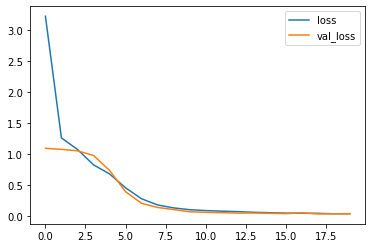

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
                             save_best_only=True)
callbacks_list = [checkpoint]

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(train_data, y_train, validation_split=0.2, epochs=20,
                     callbacks=callbacks_list)
plt.plot(training.history["loss"], label='loss')
plt.plot(training.history["val_loss"], label='val_loss')
plt.legend()
plt.show()

 - Batch Normalization: Se trata de modificar el output de cualquiera de los layer y reescalarlo de tal manera que logre media 0 y desviación estandar de 1

Epoch 1/20
17/17 [==============================] - 7s 240ms/step - loss: 0.7643 - accuracy: 0.5916 - val_loss: 0.9675 - val_accuracy: 0.9701
Epoch 2/20
17/17 [==============================] - 4s 222ms/step - loss: 0.5748 - accuracy: 0.7325 - val_loss: 0.8915 - val_accuracy: 0.9776
Epoch 3/20
17/17 [==============================] - 4s 211ms/step - loss: 0.4517 - accuracy: 0.8846 - val_loss: 0.8318 - val_accuracy: 0.7836
Epoch 4/20
17/17 [==============================] - 3s 195ms/step - loss: 0.3838 - accuracy: 0.8458 - val_loss: 0.7415 - val_accuracy: 0.9552
Epoch 5/20
17/17 [==============================] - 3s 178ms/step - loss: 0.2535 - accuracy: 0.9423 - val_loss: 0.6276 - val_accuracy: 0.8507
Epoch 6/20
17/17 [==============================] - 3s 172ms/step - loss: 0.1769 - accuracy: 0.9697 - val_loss: 0.4030 - val_accuracy: 0.9627
Epoch 7/20
17/17 [==============================] - 3s 177ms/step - loss: 0.0953 - accuracy: 0.9869 - val_loss: 0.4163 - val_accuracy: 0.8582
Epoch 

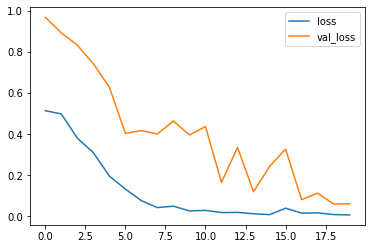

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss',
                             save_best_only=True)
callbacks_list = [checkpoint]

model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(train_data, y_train, validation_split=0.2, epochs=20,
                     callbacks=callbacks_list)
plt.plot(training.history["loss"], label='loss')
plt.plot(training.history["val_loss"], label='val_loss')
plt.legend()
plt.show()

(*The disharmony of batch normalization and dropout*) Dropout y batch normalization no siempre funcionan bien juntas, esto porque dropout hace más lento el entrenamiento haciendo que se ponga más atención a cada neurona, mientras batch normalization busca hacer el entrenamiento más rápido

### 4.2- Interpretabilidad del modelo

Una vez que el modelo esta creado, la información de cada uno de los layers se guarda en el atributo layers

In [14]:
conv1 = model.layers[0]
weights1 = conv1.get_weights()
len(weights1)

2

El primer atributo de weights1 es el valor de cada uno de los pesos para ese layer en especifico

In [16]:
kernel1 = weights1[0]
kernel1.shape

(3, 3, 1, 10)

Las primeras dos dimensiones denotan el tamaño del kernel, la tercera dimensión es el número de canales en cada una de las kernel y la ultima dimensión es el número de kernels en este layer

Para obtener la primera kernel en este layer usamos el indice 0 en esta dimensión

In [18]:
kernel1_1 = kernel1[:, :, 0, 0]
kernel1_1.shape

(3, 3)

Podemos visualizar esa kernel directamente, pero no es fácil entender a que caracteristica esta kernel esta respondiendo

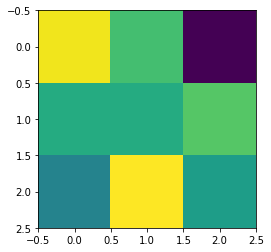

In [19]:
plt.imshow(kernel1_1)

Si queremos entender que hace exactamente podemos tomar una imagen del set de testeo y hacerla pasar por la kernel y ver que caracteristicas de esa imagen se enfatizan

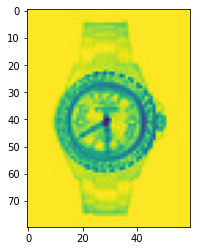

In [26]:
test_image = test_data[1, :, :, 0]
plt.imshow(test_image)

Ahora lo pasamos a través del kernel

In [29]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    
    for ii in range(image.shape[0] - 3):
        for jj in range(image.shape[1] - 3):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)
    return result

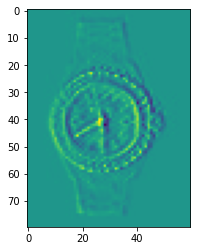

In [30]:
filtered_image = convolution(test_image, kernel1_1)
plt.imshow(filtered_image)

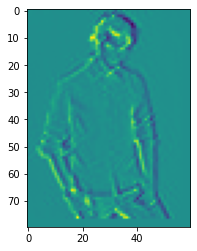

In [31]:
filtered_image = convolution(test_data[0, :, :, 0], kernel1_1)
plt.imshow(filtered_image)